<a href="https://colab.research.google.com/github/keymemory/DYC_Machine_Learning/blob/main/ML_day4_predict_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 준비하기

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


데이터 준비하기

In [ ]:

dataset_path = keras.utils.get_file("iris.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
dataset_path

8192/4551 [======================================================] - 0s 0us/step


'/root/.keras/datasets/iris.data'

데이터 확인하기


In [ ]:
column_names = ['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

dataset = raw_dataset.copy()
print(dataset.tail())


     sepal length in cm  sepal width in cm  ...  petal width in cm           class
145                 6.7                3.0  ...                2.3  Iris-virginica
146                 6.3                2.5  ...                1.9  Iris-virginica
147                 6.5                3.0  ...                2.0  Iris-virginica
148                 6.2                3.4  ...                2.3  Iris-virginica
149                 5.9                3.0  ...                1.8  Iris-virginica

[5 rows x 5 columns]


데이터셋 생성하기 - 입력(속성값 4개)와 출력(판정결과 1개) 변수로 분리


In [ ]:
X = dataset.iloc[:, 0:4]
y = dataset.iloc[:, 4]

print(set(y))


{'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'}


레이블을 범주형 형태로 변경


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(y)
Y_encodered = encoder.transform(y)

print(Y_encodered)

Y = np_utils.to_categorical(Y_encodered)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


학습/테스트 8:2 비율로 분리


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(120, 4)
(120, 3)
(30, 4)
(30, 3)


모델 구성하기


In [ ]:
model = Sequential()

model.add(Dense(16, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))


모델 설정하기


In [ ]:
# 다중이면 카테고리 크로스엔트로피
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=200, 
                    batch_size=10,
                    validation_data = (X_test, y_test))


Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 0s 3ms/step - loss: 1.7449 - accuracy: 0.0750 - val_loss: 1.3143 - val_accuracy: 0.0000e+00
Epoch 2/200
120/120 [==============================] - 0s 163us/step - loss: 1.5978 - accuracy: 0.0750 - val_loss: 1.2352 - val_accuracy: 0.0333
Epoch 3/200
120/120 [==============================] - 0s 173us/step - loss: 1.4668 - accuracy: 0.1750 - val_loss: 1.1800 - val_accuracy: 0.2333
Epoch 4/200
120/120 [==============================] - 0s 178us/step - loss: 1.3629 - accuracy: 0.3083 - val_loss: 1.1169 - val_accuracy: 0.2333
Epoch 5/200
120/120 [==============================] - 0s 162us/step - loss: 1.2649 - accuracy: 0.3250 - val_loss: 1.0762 - val_accuracy: 0.2333
Epoch 6/200
120/120 [==============================] - 0s 160us/step - loss: 1.1964 - accuracy: 0.2917 - val_loss: 1.0428 - val_accuracy: 0.2333
Epoch 7/200
120/120 [==============================] - 0s 160us/step - loss: 1.1390

학습 결과 그려보기


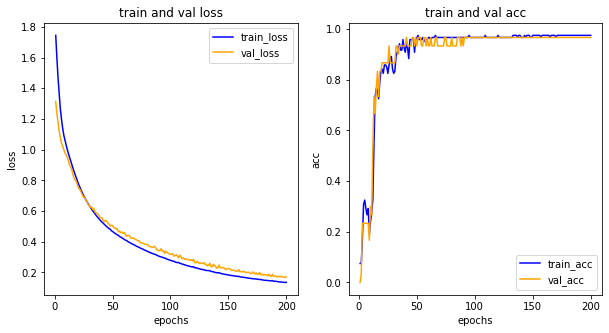

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()


모델평가하기


In [ ]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))



30/30 [==============================] - 0s 97us/step
accuracy: 96.67%
